In [7]:
#import necessary libraries
import pandas as pd

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.linear_model import LogisticRegression

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [18]:
import seaborn as sns

In [40]:
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv('./dataset/diabetes.csv')

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [37]:
df['BMI']=df.BMI.replace(0,df.BMI.mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


<Axes: ylabel='Pregnancies'>

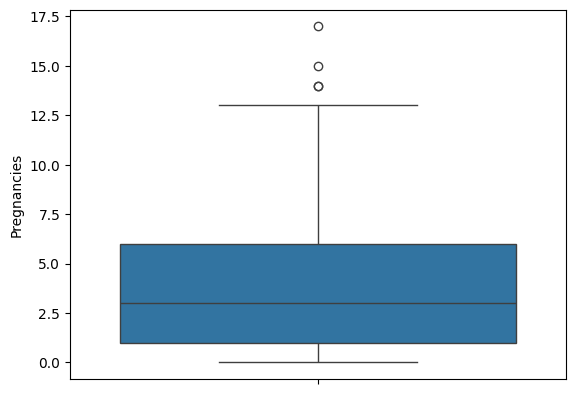

In [19]:
sns.boxplot(df['Pregnancies'])

In [21]:
q0,q1,q2,q3,q4=np.quantile(df['Pregnancies'],[0,0.25,0.50,0.75,1])

In [22]:
iqr=q3-q1

In [31]:
lower_fence=q1-1.5*iqr
upper_fence=q3+2.5*iqr

In [32]:
lower_fence,upper_fence

(-4.5, 10.5)

In [33]:
df[ (df['Pregnancies']>upper_fence) | (df['Pregnancies']<lower_fence) ].shape

(34, 9)

<Axes: >

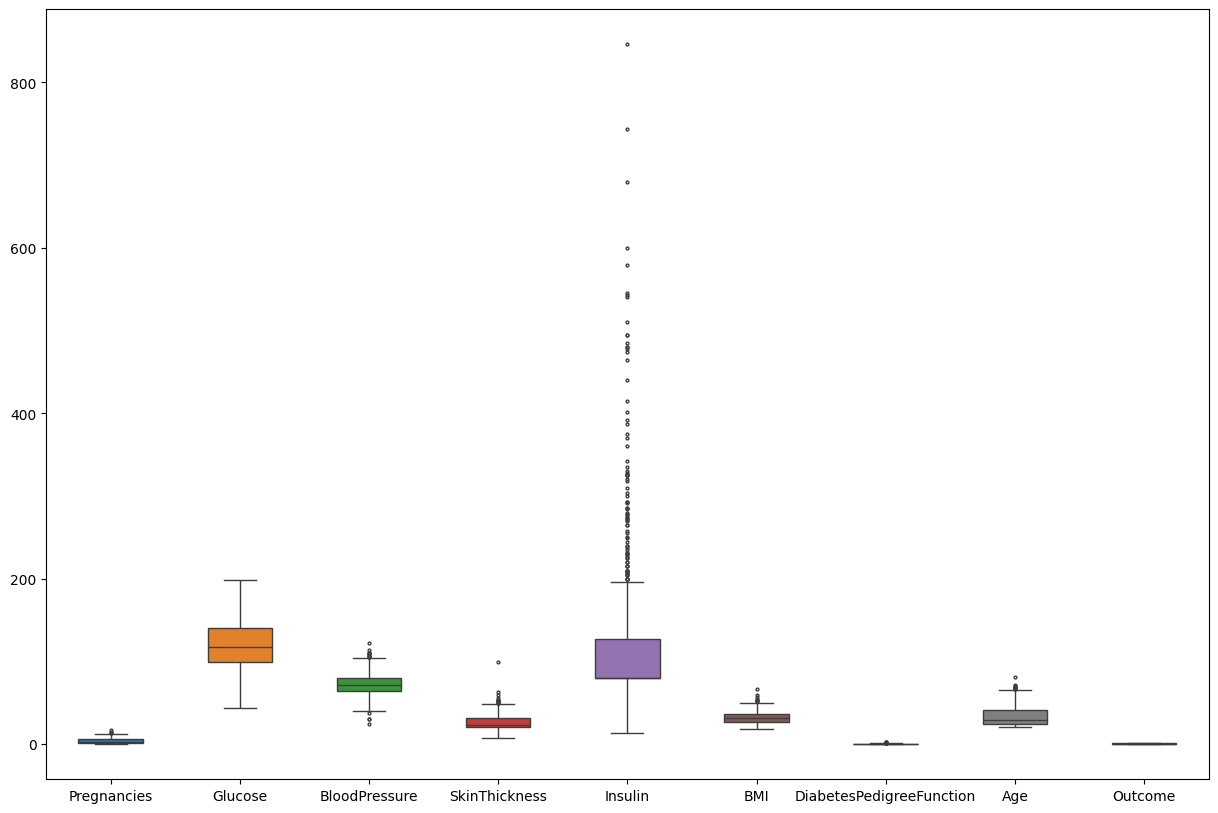

In [50]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=df,width=0.5,fliersize=2)

In [56]:
df.shape

(768, 9)

In [57]:
# distribute the dependent and the independent features
x=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [58]:
x.shape,Y.shape

((768, 8), (768,))

In [59]:
# split the data for training and testing
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.20,random_state=42)

In [ ]:
#def standard_scaler(x_test,y_test):
    

In [61]:
scaler=StandardScaler()

In [62]:
x_train_scaled=scaler.fit_transform(x_train)

In [63]:
x_test_scaled=scaler.transform(x_test)

In [64]:
import pickle

In [66]:
#serialize the scaler to store on a disk using the pickle file

pickle.dump(scaler,open('scaler.pkl','wb'))

In [69]:
logistic_model=LogisticRegression()

In [72]:
logistic_model.fit(x_train_scaled,Y_train)

LogisticRegression()

In [76]:
logistic_model.predict_proba(x_test_scaled)

array([[0.74094604, 0.25905396],
       [0.82732567, 0.17267433],
       [0.89045972, 0.10954028],
       [0.84852226, 0.15147774],
       [0.53605073, 0.46394927],
       [0.58082806, 0.41917194],
       [0.98636165, 0.01363835],
       [0.59243197, 0.40756803],
       [0.42893833, 0.57106167],
       [0.22824886, 0.77175114],
       [0.77336   , 0.22664   ],
       [0.101509  , 0.898491  ],
       [0.6426295 , 0.3573705 ],
       [0.70806744, 0.29193256],
       [0.92138826, 0.07861174],
       [0.61276058, 0.38723942],
       [0.88423138, 0.11576862],
       [0.92909742, 0.07090258],
       [0.25594344, 0.74405656],
       [0.40506739, 0.59493261],
       [0.8136558 , 0.1863442 ],
       [0.92769739, 0.07230261],
       [0.50926255, 0.49073745],
       [0.90704792, 0.09295208],
       [0.4449232 , 0.5550768 ],
       [0.10603025, 0.89396975],
       [0.89080386, 0.10919614],
       [0.97093171, 0.02906829],
       [0.74576188, 0.25423812],
       [0.89190666, 0.10809334],
       [0.

In [79]:
Y_pred=logistic_model.predict(x_test_scaled)

In [78]:
#to store the moedl on the disk
pickle.dump(logistic_model,open('logistic_model.pkl','wb'))

In [81]:
accuracy_score(Y_pred,Y_test)*100

76.62337662337663

In [82]:
confusion_matrix(Y_pred,Y_test)

array([[83, 20],
       [16, 35]], dtype=int64)

In [99]:
## Hyper parameter tuning

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [84]:
import numpy as np

In [85]:
parameters={
    'penalty':['l1','l2'],
    'C':np.logspace(-3,3,7),
    'solver':['newton-cg','lbfgs','liblinear']
}

In [86]:
log_reg=LogisticRegression()

In [88]:
clf=GridSearchCV(log_reg,  #model
                 param_grid=parameters, #hyper parameters
                 scoring='accuracy', # metric for scoring
                 cv=10  #number of folds
                )

In [93]:
clf.fit(x_train_scaled,Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [94]:
clf.best_params_

{'C': 100.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [105]:
log_reg=LogisticRegression(C= 100.0, penalty= 'l2',solver='newton-cg')

In [107]:
log_reg.fit(x_train_scaled,Y_train)

LogisticRegression(C=100.0, solver='newton-cg')

In [95]:
clf.best_score_

0.7686673717609731

In [108]:
Y_pred=log_reg.predict(x_test_scaled)

In [109]:
confusion_matrix(Y_pred,Y_test)

array([[83, 20],
       [16, 35]], dtype=int64)

In [110]:
print(classification_report(Y_pred,Y_test))
print(accuracy_score(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       103
           1       0.64      0.69      0.66        51

    accuracy                           0.77       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.77      0.77       154

0.7662337662337663


In [111]:
file=open('logistic_model.pkl','wb')
pickle.dump(log_reg,file)
file.close()